In [6]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/Users/KangChanhyuk/Desktop/자주연1/(Final) total_emo_sentiment_csv4new_equal.csv', engine = 'python')

sentiment = 'new'

col = [sentiment, 'Utterance']
df = df[col]
df[sentiment] = pd.to_numeric(df[sentiment])



In [37]:
display(df.head())

,MELD,Utterance
0,1,"Alright, so I'm back in high school, I'm stand..."
1,0,"Oh, yeah. Had that dream."
2,1,"Then I look down, and I realize there's a phon..."
3,1,Instead of...?
4,0,That's right.


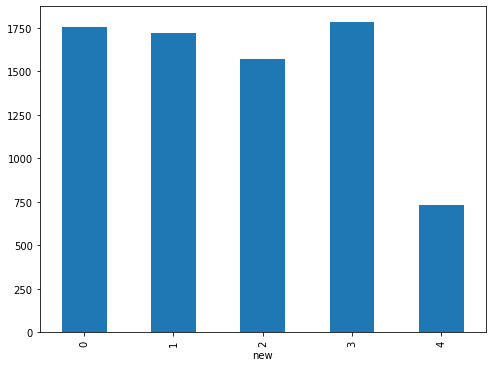

In [4]:
emotion_dict = {'pos':0, 'pneu':1, 'neu':2, 'nneu':3, 'neg':4}
emo_keys = list(['pos','pneu','neu', 'nneu', 'neg'])

# emotion_dict = {'positive': 1, 'negative': 2, 'neutral': 0, }
# emo_keys = list(['neutral','positive','negative'])

fig = plt.figure(figsize=(8,6))
df.groupby(sentiment).Utterance.count().plot.bar(ylim=0)
plt.show()

In [6]:

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['Utterance'].values.astype('U'))
# features =x.fit_transform(df.Utterance).toarray()

labels = df.new
print(features.shape)
# print(features)
# # rmse_std = df.rmse_std
# # harmonic = df.harmonic
# big_df = pd.merge(df.Utterance, rmse_std)
# print(big_df,shape)
# energy
# energy_entropy
# spectral_spread
# spectral_flux
# mfcc_1
# mfcc_2
# mfcc_3
# mfcc_4
# mfcc_5
# mfcc_6
# mfcc_7
# mfcc_8
# mfcc_9
# mfcc_10
# mfcc_11
# mfcc_12
# mfcc_13
# chroma_std
# delta spectral_flux



(7565, 1067)


In [40]:
x_train_text, x_test_text, y_train_text, y_test_text = train_test_split(features, labels, test_size=0.20)

x_train_text = features[:x_train_text.shape[0]]
x_test_text = features[-x_test_text.shape[0]:]

print(features.shape, x_train_text.shape, x_test_text.shape)

df = pd.read_csv('C:/Users/KangChanhyuk/Desktop/자주연1/(Final) total_emo_sentiment_csv4new_else3_equal.csv', engine = 'python')

combined_x_train = np.concatenate((np.array(x_train[x_train.columns[21:]]), x_train_text), axis=1)
combined_x_test = np.concatenate((np.array(x_test[x_test.columns[21:]]), x_test_text), axis=1)
# combined_x_train = np.concatenate((np.array(x_train_audio[x_train_audio.columns[2:]]), x_train_text), axis=1)
# combined_x_test = np.concatenate((np.array(x_test_audio[x_test_audio.columns[2:]]), x_test_text), axis=1)

print(combined_x_train.shape, combined_x_test.shape)

combined_features_dict = {}

combined_features_dict['x_train'] = combined_x_train
combined_features_dict['x_test'] = combined_x_test
combined_features_dict['y_train'] = np.array(y_train)
combined_features_dict['y_test'] = np.array(y_test)

(4332, 546) (3465, 546) (867, 546)


AttributeError: 'Series' object has no attribute 'columns'

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)


In [15]:

rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

# with open('pred_probas/text_rf_classifier.pkl', 'wb') as f:
#     pickle.dump(pred_probs, f)

ValueError: could not convert string to float: 'Oh. Oh my God.'

Test Set Accuracy =  0.295
Test Set F-score =  0.249
Test Set Precision =  0.264
Test Set Recall =  0.259
Confusion matrix, without normalization
[[116 138  36  50   7]
 [ 87 161  45  59   4]
 [ 38 134  67  61   4]
 [ 62 146  51 100  10]
 [ 22  60  17  36   2]]


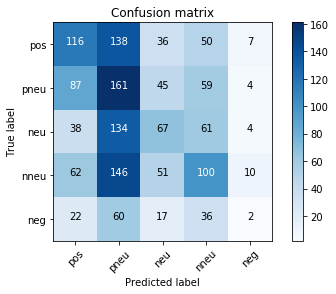

In [9]:
xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.009, objective='multi:softprob', 
                                   n_estimators=1200, sub_sample=0.8, num_class=len(emotion_dict),
                                   booster='gbtree', n_jobs=4)
xgb_classifier.fit(x_train, y_train)

# Predict
pred_probs = xgb_classifier.predict_proba(x_test)
predictions = xgb_classifier.predict(x_test)


# Results
display_results(y_test, pred_probs)

Test Set Accuracy =  0.423
Test Set F-score =  0.415
Test Set Precision =  0.419
Test Set Recall =  0.421
Confusion matrix, without normalization
[[65 58 42]
 [40 90 28]
 [43 60 44]]


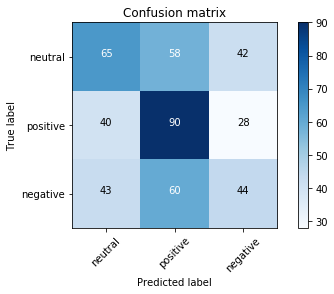

In [39]:

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(x_train, y_train)

# Predict
pred_probs = mlp_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

### Word2Vec

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/KangChanhyuk/Desktop/자주연1/(Final) total_emo_sentiment_csv4new3_equal.csv', engine = 'python')
x_train, x_test, y_train, y_test = train_test_split(df['Utterance'], df['new3'], test_size=0.20)

#sentences = df['Utterance']
sentences = x_train
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index)+1
print(vocab_size)

X_encoded = t.texts_to_sequences(df['Utterance'])
#print(X_encoded)
max_len = max(len(i) for i in X_encoded)
print(max_len)

X_encoded = t.texts_to_sequences(x_train)
X_train = pad_sequences(X_encoded, maxlen = max_len, padding='post')
########################################

sentences = x_test 
t = Tokenizer()
t.fit_on_texts(sentences)
print(len(t.word_index)+1)

X_encoded = t.texts_to_sequences(sentences)
#print(X_encoded)
# max_len = max(len(i) for i in X_encoded)
print(max_len)

X_test = pad_sequences(X_encoded, maxlen = max_len, padding='post')
#y_train = np.array(df['IEMOCAP'])


(1878,)
(470,)
(1878,)
(470,)
2233
68
1007
68


In [1]:
import gensim

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
print(word2vec_model.vectors.shape)

(3000000, 300)


In [30]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(1000, 300),
    max_iter=30,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    tol=1e-4,
    random_state=1,
    learning_rate_init=.1
)

mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)
print("테스트 정확도: {:.3f}".format(accuracy_score(y_pred, y_test)))

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 84115130810189884850125448008452454481920.00000000
Iteration 4, loss = 106852231113909443361388006675726620164096.00000000
Iteration 5, loss = 110579314054706904880224823514050414510080.00000000
Iteration 6, loss = 111143955548880099581917710961765116805120.00000000
Iteration 7, loss = 111226967445384613065231126544651504320512.00000000
Iteration 8, loss = 111237532529254017412721903913144082759680.00000000
Iteration 9, loss = 111237220249355983123961179167461931483136.00000000
Iteration 10, loss = 111235275295621003190995569976364234702848.00000000
Iteration 11, loss = 111233085322861335941375979643617497055232.00000000
Iteration 12, loss = 111230858612163739746555715790611851247616.00000000
Iteration 13, loss = 111228626425409268839119485650803275857920.00000000
Iteration 14, loss = 111226393454834048072853835570954419306496.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stop

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# class DNN(models.Sequential):
#     def __init__(self, Nin, Nh_l, Pd_l, Nout):
#         super().__init__()
 
#         # 첫 번째 은닉층
#         self.add(layers.Dense(Nh_l[0], activation='relu',input_shape=(Nin,), name='Hidden-1'))
#         # Dropout 확률을 정한다.
#         # Dropout : 랜덤으로 몇개의 노드를 비활성화 한다.(오버피팅 방지)
#         self.add(layers.Dropout(Pd_l[0]))
#         self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
#         self.add(layers.Dropout(Pd_l[1]))
#         self.add(layers.Dense(Nh_l[2], activation='relu', name='Hidden-3'))
#         self.add(layers.Dropout(Pd_l[2]))
        
#         self.add(layers.Dense(Nout))
#         self.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# Nh_l = [2000, 1000, 1000]
# Pd_l = [0, 0, 0, 0]        
# model = DNN(X_train.shape[1], Nh_l, Pd_l, 3)


embedding_matrix = np.zeros((vocab_size,300))
print(np.shape(embedding_matrix))

def get_vector(word) : 
    if word in word2vec_model : 
        return word2vec_model[word]
    else : 
        return None
    
for word, i in t.word_index.items() : 
    temp = get_vector(word)
    if temp is not None : 
        embedding_matrix[i] = temp
        
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Dense(100, activation='sigmoid', name='Hidden-2'))
model.add(Dense(30, activation='sigmoid', name='Hidden-'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, verbose=2)


(2875, 300)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3465 samples
Epoch 1/20
3465/3465 - 1s - loss: 0.5920 - acc: 0.4058
Epoch 2/20
3465/3465 - 1s - loss: 0.5879 - acc: 0.4084
Epoch 3/20
3465/3465 - 1s - loss: 0.5686 - acc: 0.4081
Epoch 4/20
3465/3465 - 1s - loss: 0.5638 - acc: 0.4081
Epoch 5/20
3465/3465 - 1s - loss: 0.5600 - acc: 0.4081
Epoch 6/20
3465/3465 - 1s - loss: 0.5586 - acc: 0.4081
Epoch 7/20
3465/3465 - 1s - loss: 0.5492 - acc: 0.4081
Epoch 8/20
3465/3465 - 1s - loss: 0.5454 - acc: 0.4081
Epoch 9/20
3465/3465 - 1s - loss: 0.5376 - acc: 0.4081
Epoch 10/20
3465/3465 - 1s - loss: 0.5321 - acc: 0.4081
Epoch 11/20
3465/3465 - 1s - loss: 0.5270 - acc: 0.4081
Epoch 12/20
3465/3465 - 1s - loss: 0.5166 - acc: 0.4084
Epoch 13/2

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(Nh_l[0], activation='relu',input_shape=(Nin,), name='Hidden-1'))
        # Dropout 확률을 정한다.
        # Dropout : 랜덤으로 몇개의 노드를 비활성화 한다.(오버피팅 방지)
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nh_l[2], activation='relu', name='Hidden-3'))
        self.add(layers.Dropout(Pd_l[2]))
        
        self.add(layers.Dense(Nout))
        self.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

Nh_l = [2000, 1000, 1000]
Pd_l = [0, 0, 0, 0]        
model = DNN(X_train.shape[1], Nh_l, Pd_l, 3)
        
model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, verbose=2)



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1878 samples
Epoch 1/50
1878/1878 - 0s - loss: 0.5094 - acc: 0.3477
Epoch 2/50
1878/1878 - 0s - loss: 0.2255 - acc: 0.3477
Epoch 3/50
1878/1878 - 0s - loss: 0.1858 - acc: 0.3477
Epoch 4/50
1878/1878 - 0s - loss: 0.1743 - acc: 0.3477
Epoch 5/50
1878/1878 - 0s - loss: 0.1585 - acc: 0.3477
Epoch 6/50
1878/1878 - 0s - loss: 0.1382 - acc: 0.3477
Epoch 7/50
1878/1878 - 0s - loss: 0.1134 - acc: 0.3477
Epoch 8/50
1878/1878 - 0s - loss: 0.0806 - acc: 0.3477
Epoch 9/50
1878/1878 - 0s - loss: 0.0414 - acc: 0.3477
Epoch 10/50
1878/1878 - 0s - loss: -5.4214e-03 - acc: 0.3477
Epoch 11/50
1878/1878 - 0s - loss: -6.8257e-02 - acc: 0.3477
Epoch 12/50
1878/1878 - 0s - loss: -1.3358e-01 - acc: 0.3477
Epoch 1

1628    2
2302    2
528     0
800     1
2071    2
       ..
472     0
1419    1
17      0
889     1
937     1
Name: new3, Length: 470, dtype: int64
[[1.        ]
 [1.        ]
 [0.99999976]
 [1.        ]
 [0.99999917]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9999957 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9990214 ]
 [0.9999978 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.999336  ]
 [0.99996233]
 [0.99992216]
 [1.        ]
 [0.81865776]
 [1.        ]
 [0.980681  ]
 [1.        ]
 [0.99853367]
 [1.        ]
 [1.        ]
 [0.9999947 ]
 [1.        ]
 [0.9999999 ]
 [0.99995166]
 [1.        ]
 [1.        ]
 [0.9999447 ]
 [1.        ]
 [0.9870499 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9987503 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99998766]
 [1.        ]
 [0.9999964 ]
 [1.        ]
 [0.99566257]
 [0.91432506]
 [1.        ]
 [0.99999154]
 [0.9999998 ]
 [1.        

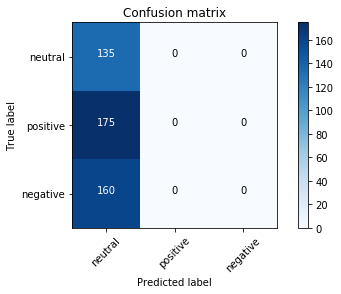

In [14]:
from IPython.display import display
import matplotlib.pyplot as plt

emotion_dict = {'positive': 1, 'negative': 2, 'neutral': 0, }
emo_keys = list(['neutral','positive','negative'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

y_pred = model.predict(X_test)
print(y_test)
print(y_pred)
display_results(y_test, y_pred)

Test Set Accuracy =  0.389
Test Set F-score =  0.387
Test Set Precision =  0.394
Test Set Recall =  0.388
Confusion matrix, without normalization
[[53 45 37]
 [60 76 39]
 [64 42 54]]


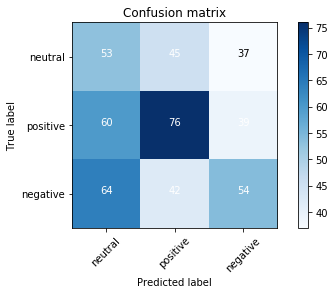

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(X_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(X_test)

# Results
display_results(y_test, pred_probs)

# with open('pred_probas/text_rf_classifier.pkl', 'wb') as f:
#     pickle.dump(pred_probs, f)